Task 1 (2p.): Compare at least 3 different community detection algorithms for 2 different datasets (graphs).
Compute the partitions and compare their modularity.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from networkx.algorithms.community.centrality import girvan_newman
import itertools

%matplotlib inline

## Loading congress twitter data

In [2]:
congress = pd.read_csv(
    'congress.edgelist',
    delimiter=' ',
    names=['source', 'target'],
    usecols=[0, 1]  # specify the columns to read
)

In [3]:
G = nx.from_pandas_edgelist(congress, 'source', 'target')

In [30]:
def visualize_communities(G, communities):
    color_map = []
    for node in G:
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)
                break

    # Draw the graph
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    plot_options = {"node_size": 50, "with_labels": False, "width": 0.15}
    nx.draw_networkx(G, cmap = plt.cm.Paired, node_color=color_map, **plot_options)

## nx Modularity-based communities

In [7]:
mbc = nx.community.greedy_modularity_communities(G)
print("Number of communities:", len(mbc))
print("Modularity:", nx.community.modularity(G, mbc))


Number of communities: 3
Modularity: 0.37526979800148696


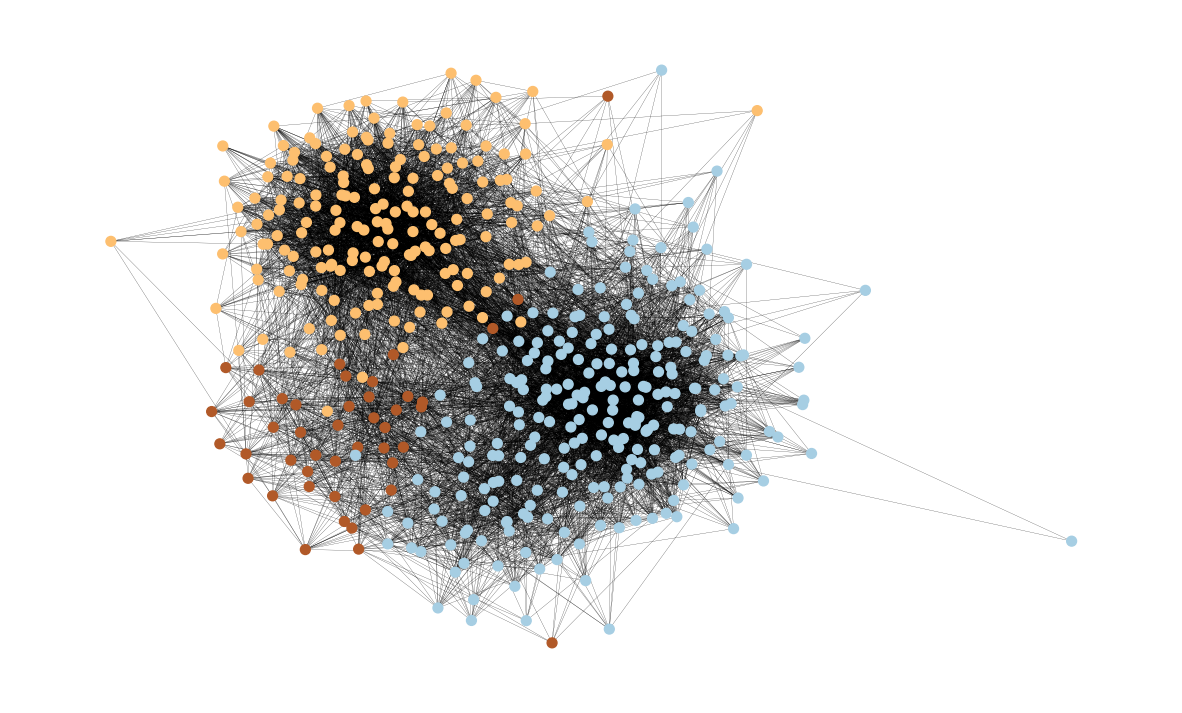

In [31]:
visualize_communities(G, mbc)

## nx Louvain Community Detection

In [12]:
lcd = nx.community.louvain_communities(G, seed=123)
print("Number of communities:", len(lcd))
print("Modularity:", nx.community.modularity(G, lcd))

Number of communities: 4
Modularity: 0.41322962362341387


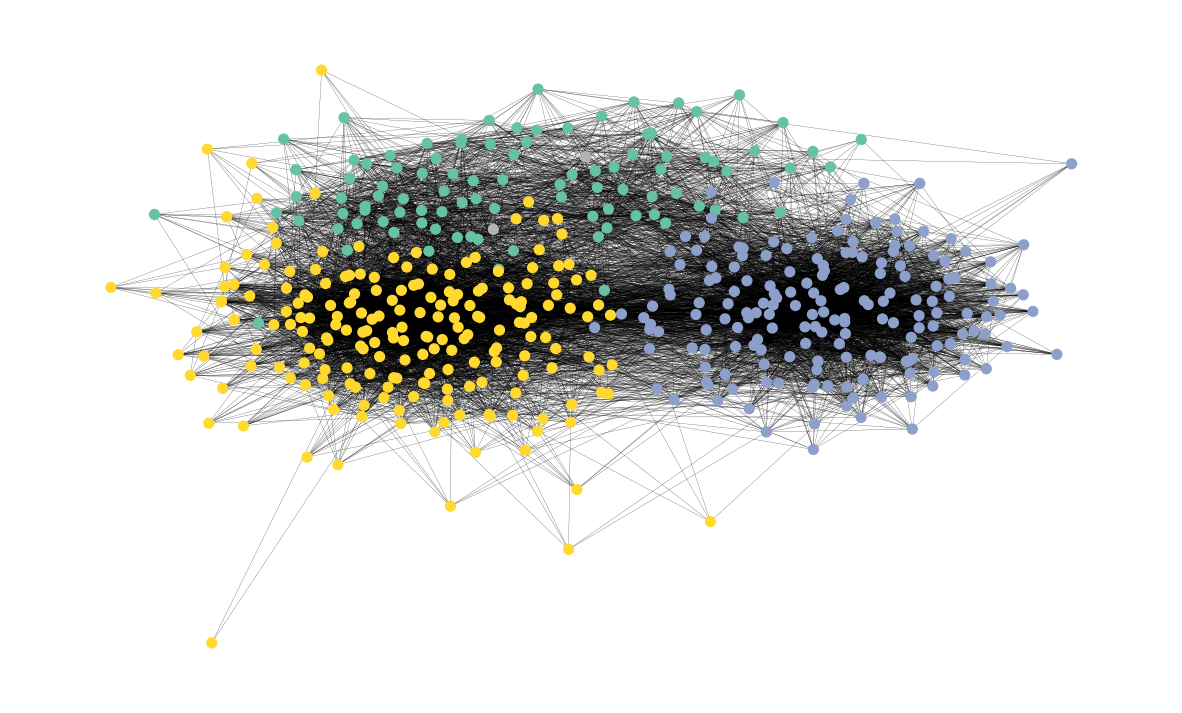

In [21]:
visualize_communities(G, lcd)

## nx Label propagation

In [36]:
lp = nx.community.label_propagation_communities(G)
print("Number of communities:", len(lp))
print("Modularity:", nx.community.modularity(G, lp))

Number of communities: 2
Modularity: 0.3332852343021128


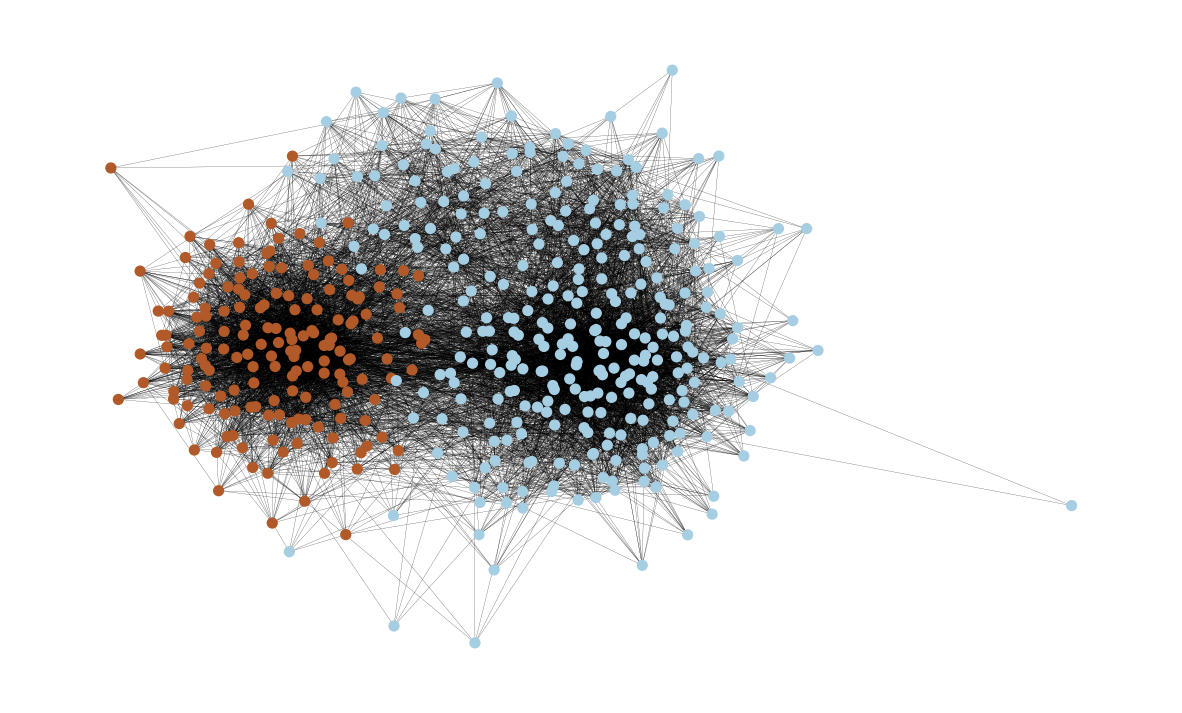

In [37]:
visualize_communities(G, lp)